<a href="https://colab.research.google.com/github/Abdalfttah112/game-design-portfolio/blob/main/AbdalfttahAlyan_ML_Powered_Game_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
from google.colab import files
uploaded_file = files.upload()


Saving games.csv to games.csv


In [3]:
games = pd.read_csv(list(uploaded_file.keys())[0])
games.columns = games.columns.str.strip()


In [4]:
print("Sample:\n", games.head(3))
print("\nTypes:\n", games.dtypes)
print("\nStats:\n", games.describe())

Sample:
          id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   

  increment_code  white_id  white_rating   black_id  black_rating  \
0           15+2  bourgris          1500       a-00          1191   
1           5+10      a-00          1322  skinnerua          1261   
2           5+10    ischia          1496       a-00          1500   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowi

In [5]:
outcomes = games['winner'].value_counts()
draws = (games['victory_status'] == 'draw').sum()
print("\nWinners:\n", outcomes)
print(f"\nDraws: {draws} out of {len(games)} games")



Winners:
 winner
white    10001
black     9107
draw       950
Name: count, dtype: int64

Draws: 906 out of 20058 games


Text(0.5, 1.0, 'Winner Distribution')

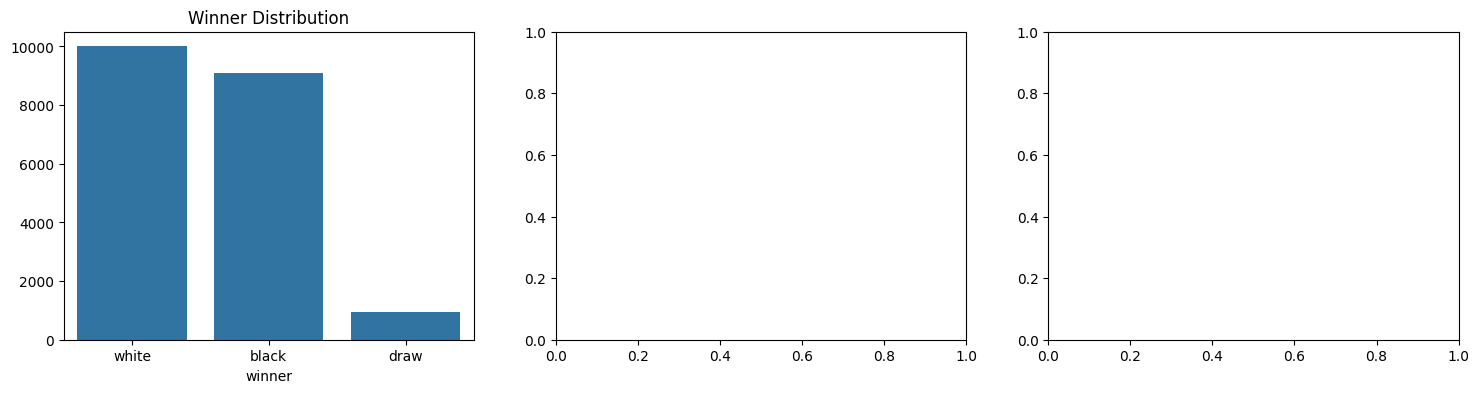

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.barplot(x=outcomes.index, y=outcomes.values, ax=axes[0])
axes[0].set_title('Winner Distribution')

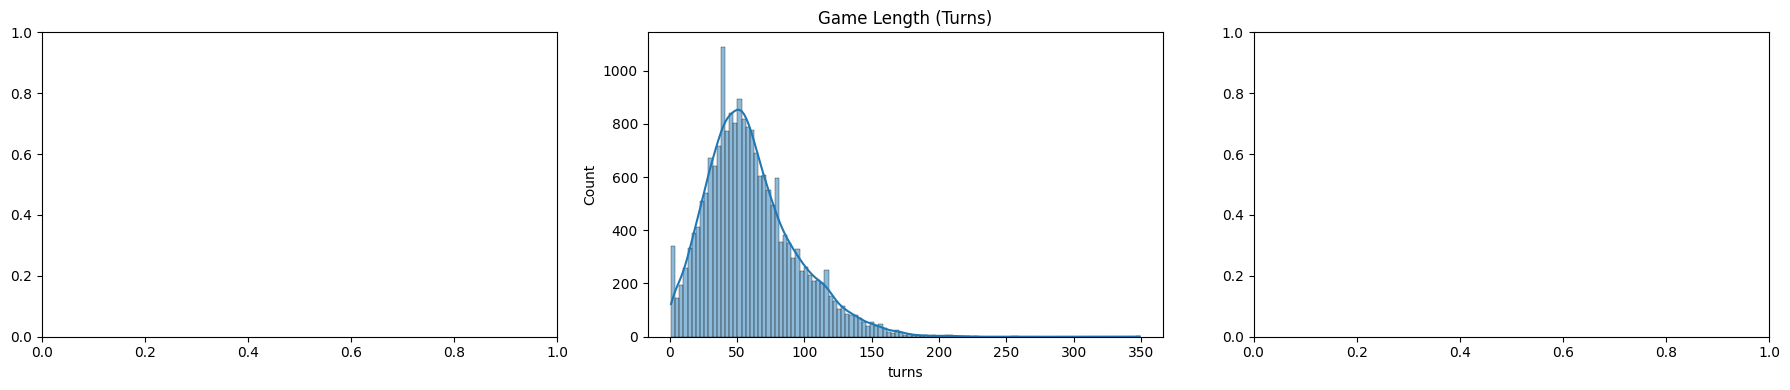

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

# إنشاء الشكل بثلاثة رسومات أفقية
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.histplot(games['turns'], kde=True, ax=axes[1])
axes[1].set_title('Game Length (Turns)')

# تأكد من عرض الشكل
plt.tight_layout()
plt.show()

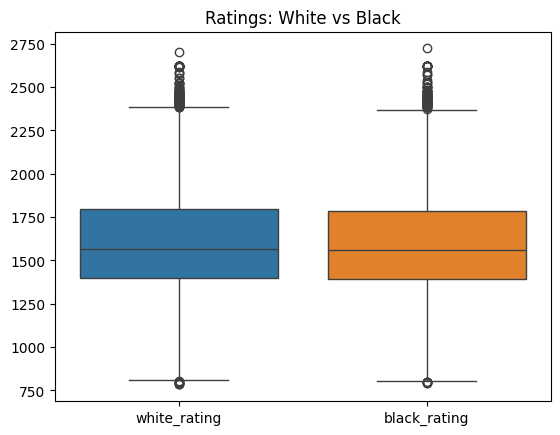

In [18]:
sb.boxplot(data=games[['white_rating', 'black_rating']])
plt.title('Ratings: White vs Black')
plt.show()



In [8]:
encoder_white = LabelEncoder()
encoder_black = LabelEncoder()

games['White_Code'] = encoder_white.fit_transform(games['white_id'])
games['Black_Code'] = encoder_black.fit_transform(games['black_id'])

In [9]:
cluster_data = games[['White_Code', 'Black_Code', 'white_rating', 'black_rating', 'turns']]
model = KMeans(n_clusters=3, random_state=42)
games['Cluster'] = model.fit_predict(cluster_data)


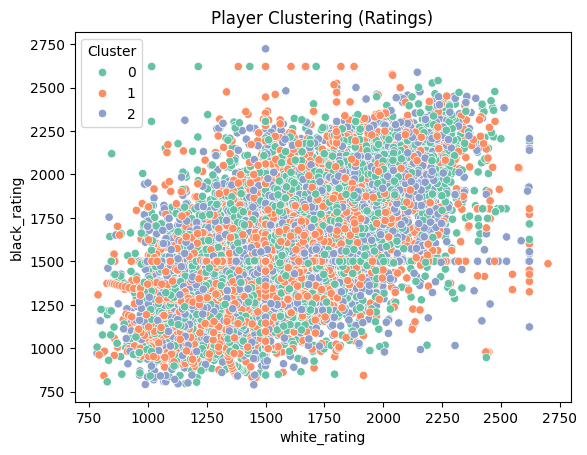

In [10]:

sb.scatterplot(x=games['white_rating'], y=games['black_rating'], hue=games['Cluster'], palette='Set2')
plt.title("Player Clustering (Ratings)")
plt.show()



Top Openings:
 opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


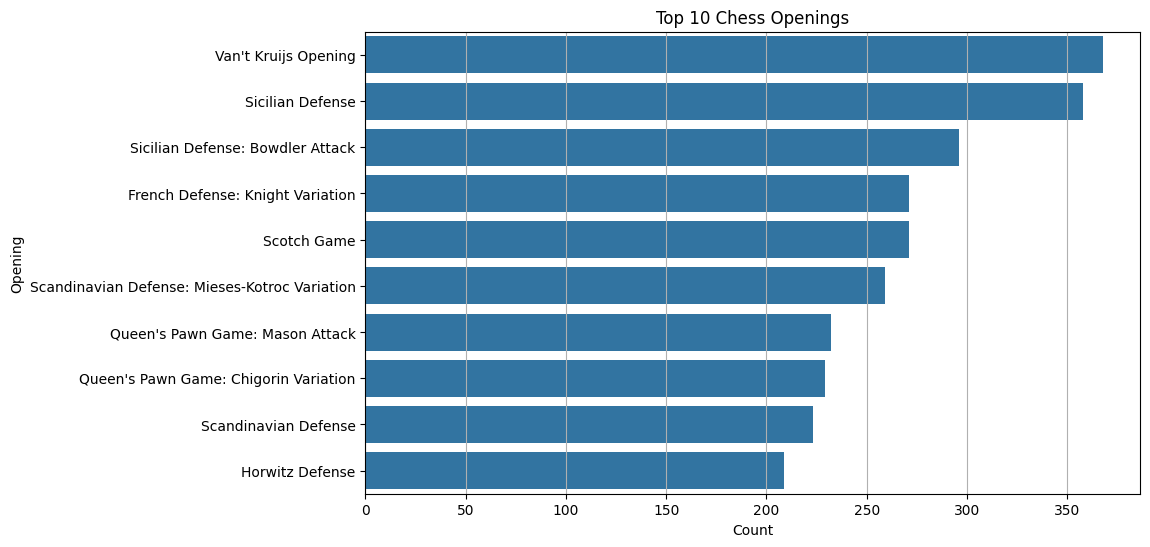

In [11]:
top_openings = games['opening_name'].value_counts().head(10)
print("\nTop Openings:\n", top_openings)

plt.figure(figsize=(10,6))
sb.barplot(y=top_openings.index, x=top_openings.values)
plt.title("Top 10 Chess Openings")
plt.xlabel("Count")
plt.ylabel("Opening")
plt.grid(axis='x')
plt.show()


In [12]:
def label_result(row):
    if row['winner'] == 'white':
        return 0
    elif row['winner'] == 'black':
        return 1
    else:
        return 2

games['OutcomeCode'] = games.apply(label_result, axis=1)


In [13]:
features = ['white_rating', 'black_rating', 'turns']
X = games[features]
y = games['OutcomeCode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

clf = DecisionTreeClassifier(max_depth=4, random_state=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['White Win', 'Black Win', 'Draw']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

   White Win       0.56      0.88      0.69      1993
   Black Win       0.70      0.33      0.45      1845
        Draw       0.00      0.00      0.00       174

    accuracy                           0.59      4012
   macro avg       0.42      0.40      0.38      4012
weighted avg       0.60      0.59      0.55      4012


Confusion Matrix:
 [[1757  236    0]
 [1235  610    0]
 [ 144   30    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


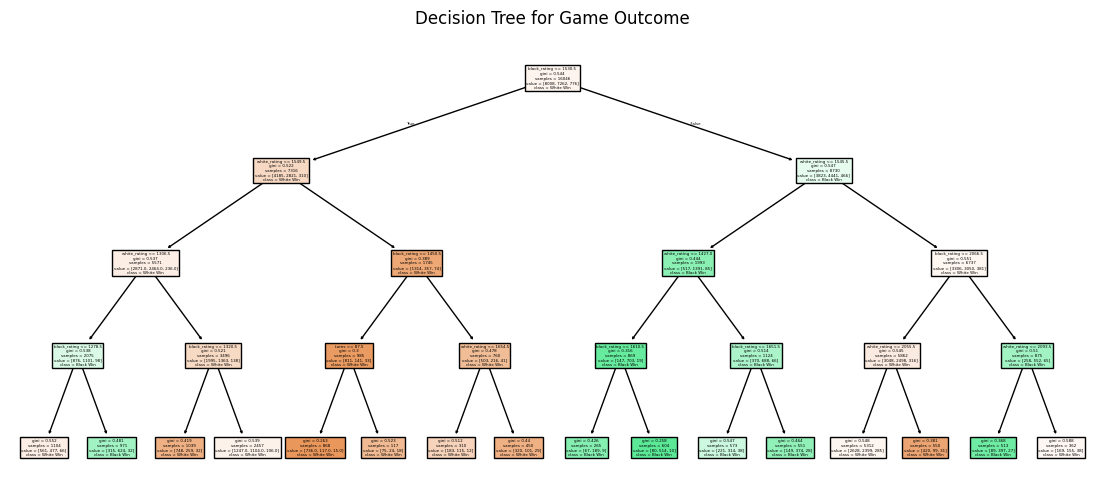

In [16]:
plt.figure(figsize=(14, 6))
plot_tree(clf, feature_names=features, class_names=['White Win', 'Black Win', 'Draw'], filled=True)
plt.title("Decision Tree for Game Outcome")
plt.show()